# Solving First-Order ODEs

Teng-Jui Lin

Content adapted from UW AMATH 301, Beginning Scientific Computing, in Spring 2020.

- Solving first-order ODEs
    - Methods
        - Forward Euler
        - Backward Euler
        - Midpoint method
        - Fourth-order Runge-Kutta (RK4) method
    - Error
- `scipy` implementation
    - Solving first-order ODEs by [`scipy.integrate.solve_ivp()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)

## Solving first-order ODEs

Suppose we have an ODE of the form

$$
\dot{y} = f(t, y).
$$

### Forward Euler

Forward Euler uses the forward difference as approximation for the derivative, having formula of

$$
y_{k+1} = y_k + f(y_k, t_k) \Delta t
$$

### Backward Euler

Backward Euler uses backward difference to approximate the derivative, having implicit formula of

$$
y_{k+1} = y_{k} + f(y_{k+1}, t_{k+1}) \Delta t
$$

At each step of backward Euler, $y_{k+1}$ can be found by finding the root of

$$
y_{k} + f(y_{k+1}, t_{k+1}) \Delta t - y_{k+1} = 0
$$

where $y_k$ is known.

### Midpoint method

Midpoint method uses the slope at the midpoint as approximation for the derivative:

1. Do a half step of forward Euler using the slope at starting point $k_1$, record the slope at midpoint $k_2$
2. Use the slope at the midpoint $k_2$ to do a full step of forward Euler to find $y_{k+1}$

The method follows the steps

$$
\begin{aligned}
k_1 &= f(y_k) \\
k_2 &= f \left( y_k + \dfrac{\Delta t}{2} k_1 \right) \\
y_{k+1} &= y_k + k_2 \Delta t
\end{aligned}
$$

### Fourth-order Runge-Kutta (RK4)

Fourth-order Runge-Kutta method uses a weighted average of slopes at the midpoint and endpoint as approximation for the derivative:

1. Do a half step of forward Euler using the slope at starting point $k_1$, record the slope at midpoint $k_2$
2. Use the slope at midpoint $k_2$ to do another half step of forward Euler, record the new slope at midpoint $k_3$
3. Use the new slope at midpoint $k_3$ to do a full step of forward Euler, record the slope at the endpoint $k_4$
4. Use a weighted average of all slopes $k_1, k_2, k_3, k_4$ to find $y_{k+1}$

The method follows the steps

$$
\begin{aligned}
k_1 &= f(y_k) \\
k_2 &= f \left( y_k + k_1 \dfrac{\Delta t}{2} \right) \\
k_3 &= f \left( y_k + k_2 \dfrac{\Delta t}{2} \right) \\
k_4 &= f (y_k + k_3 \Delta t) \\
y_{k+1} &= y_k + \dfrac{\Delta t}{6} (k_1 + 2k_2 + 2k_3 + k_4)
\end{aligned}
$$

### Errors of methods

The order of errors of each method is shown below:

|Method|Order|Global Error|Local Error|Explicit/Implicit|
|-|-:|-:|-:|-|
|Forward Euler|1|$\mathcal{O}(\Delta t)$|$\mathcal{O}(\Delta t^2)$|Explicit|
|Backward Euler|1|$\mathcal{O}(\Delta t)$|$\mathcal{O}(\Delta t^2)$|Implicit|
|Midpoint method (RK2)|2|$\mathcal{O}(\Delta t^2)$|$\mathcal{O}(\Delta t^3)$|Explicit|
|Fourth-order Runge-Kutta (RK4)|4|$\mathcal{O}(\Delta t^4)$|$\mathcal{O}(\Delta t^5)$|Explicit|

### Implementation

**Problem Statement.** Consider the ODE

$$
\dfrac{dx}{dt} = 5 \sin x
$$

with the initial condition $x(0) = \frac{\pi}{4}$. Its analytical solution is

$$
x(t) = 2\tan^{-1}\left(\dfrac{e^{5t}}{1+\sqrt{2}}\right).
$$

(a) Solve the ODE using backward Euler, forward Euler, midpoint method, RK4 method, and [`scipy.integrate.solve_ivp()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) from $t\in [0, 1]$ with $\Delta t = 0.05$.

(b) Compare the solution of each method with the analytical solution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import optimize, integrate

In [2]:
# define the ode and analytic soln
dxdt = lambda t, x : 5*np.sin(x)
x_exact = lambda t : 2*np.arctan(np.exp(5*t) / (1 + np.sqrt(2)))

In [3]:
# define time steps
dt = 0.1
t_initial = 0
t_final = 1
t = np.arange(t_initial, t_final+dt/2, dt)
t_len = len(t)

In [4]:
# forward euler
x_forward = np.zeros(t_len)
x_forward[0] = np.pi/4

for i in range(t_len - 1):
    x_forward[i+1] = x_forward[i] + dxdt(t[i], x_forward[i])*dt

In [5]:
# backward euler
x_backward = np.zeros(t_len)
x_backward[0] = np.pi/4

for i in range(t_len - 1):
    g = lambda y : y - x_backward[i] - dxdt(t[i+1], y)*dt
    x_backward[i+1] = scipy.optimize.root(g, x_backward[i]).x

In [6]:
# midpoint method
x_midpoint = np.zeros(t_len)
x_midpoint[0] = np.pi/4

for i in range(t_len - 1):
    k1 = dxdt(t[i], x_midpoint[i])
    k2 = dxdt(t[i], x_midpoint[i] + k1*dt/2)
    x_midpoint[i+1] = x_midpoint[i] + k2*dt

In [7]:
# rk4 method
x_rk4 = np.zeros(t_len)
x_rk4[0] = np.pi/4

for i in range(t_len - 1):
    k1 = dxdt(t[i], x_rk4[i])
    k2 = dxdt(t[i], x_rk4[i] + k1*dt/2)
    k3 = dxdt(t[i], x_rk4[i] + k2*dt/2)
    k4 = dxdt(t[i], x_rk4[i] + k3*dt)
    x_rk4[i+1] = x_rk4[i] + (k1 + 2*k2 + 2*k3 + k4)*dt/6

In [8]:
# scipy.integrate.solve_ivp()
x_scipy = np.zeros(t_len)
x_scipy[0] = np.pi/4

x_scipy = scipy.integrate.solve_ivp(dxdt, [t[0], t[-1]], [t[0], x_scipy[0]], t_eval=t).y[1]

In [9]:
# plot settings
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams.update({
    'font.family': 'Arial',  # Times New Roman, Calibri
    'font.weight': 'normal',
    'mathtext.fontset': 'cm',
    'font.size': 18,
    
    'lines.linewidth': 2,
    
    'axes.linewidth': 2,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.titleweight': 'bold',
    'axes.titlesize': 18,
    'axes.labelweight': 'bold',
    
    'xtick.major.size': 8,
    'xtick.major.width': 2,
    'ytick.major.size': 8,
    'ytick.major.width': 2,
    
    'figure.dpi': 80,
    
    'legend.framealpha': 1, 
    'legend.edgecolor': 'black',
    'legend.fancybox': False,
    'legend.fontsize': 14
})

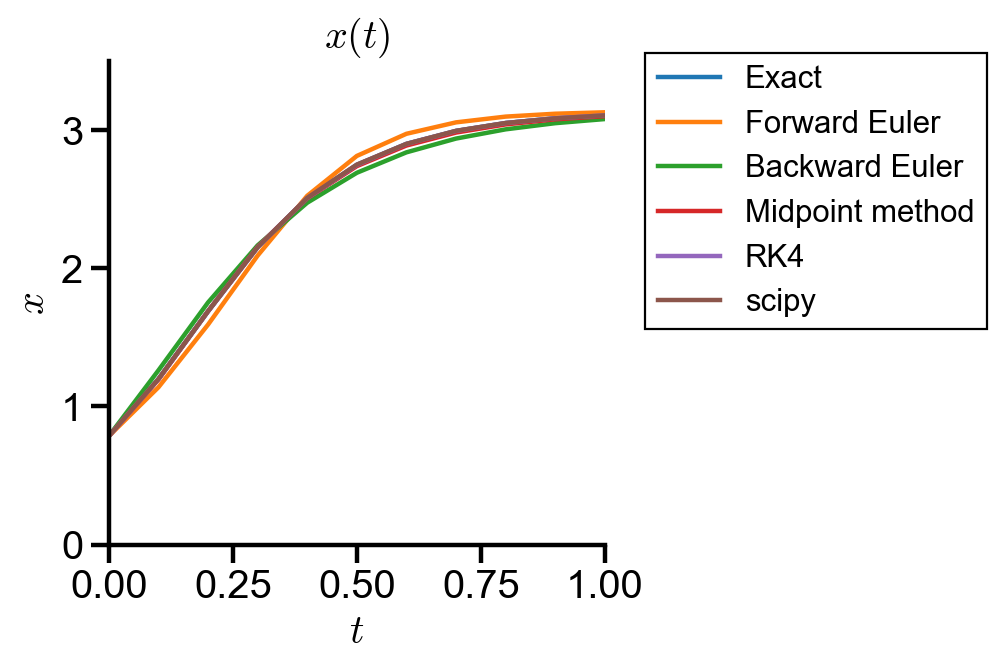

In [10]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(t, x_exact(t), label='Exact')
ax.plot(t, x_forward, label='Forward Euler')
ax.plot(t, x_backward, label='Backward Euler')
ax.plot(t, x_midpoint, label='Midpoint method')
ax.plot(t, x_rk4, label='RK4')
ax.plot(t, x_scipy, label='scipy')
ax.set_xlabel('$t$')
ax.set_ylabel('$x$')
ax.set_title('$x(t)$')
ax.set_xlim(t_initial, t_final)
ax.set_ylim(0, 3.5)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.05))

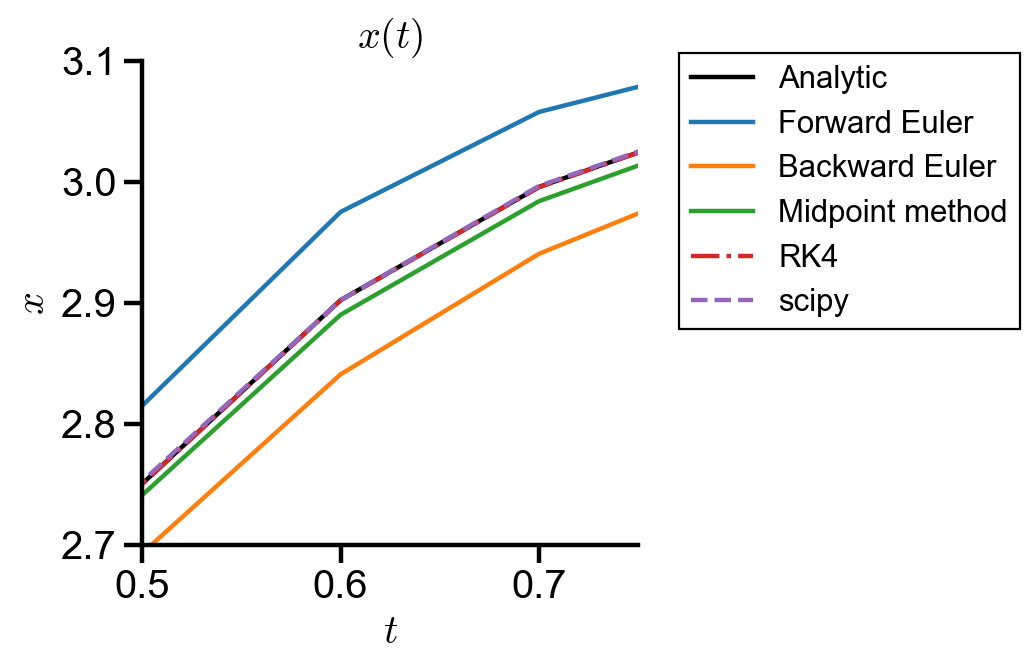

In [11]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(t, x_exact(t), label='Analytic', color='black')
ax.plot(t, x_forward, label='Forward Euler')
ax.plot(t, x_backward, label='Backward Euler')
ax.plot(t, x_midpoint, label='Midpoint method')
ax.plot(t, x_rk4, '-.', label='RK4')
ax.plot(t, x_scipy, '--', label='scipy')
ax.set_xlabel('$t$')
ax.set_ylabel('$x$')
ax.set_title('$x(t)$')
ax.set_xlim(0.5, 0.75)
ax.set_ylim(2.7, 3.1)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.05))

▲ The figure above shows the accuracy of each method. The RK4 and scipy solution agrees exactly with the analytic solution, having a fourth order error. The midpoint method is second closest to the analytic solution, having a second order error. Forward and backward Euler have the largest error, having a first order error.